# CDC Health Risk

## Data Cleaning & Manipulation : Merge & Reduce columns

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive

drive.mount('/content/drive')
# Make sure to replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
df = pd.read_csv('/content/drive/MyDrive/heart_2022_no_nans.csv')
print(df.shape)

Mounted at /content/drive
(246022, 40)


In [ ]:
df.isna().sum() # No NANs

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
RemovedTeeth,0
HadHeartAttack,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [ ]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [ ]:
# Columns to drop
drop_cols = [
    'LastCheckupTime', 'RemovedTeeth',
    'HIVTesting', 'FluVaxLast12' ,'PneumoVaxEver' ,'TetanusLast10Tdap',
  'HighRiskLastYear','HeightInMeters', 'WeightInKilograms'
]
df = df.drop(columns=drop_cols)

In [ ]:
# Combine SmokerStatus and ECigaretteUsage into one column
def map_smoking_status(row):
    # First assign e-cigarette usage level
    if row['ECigaretteUsage'] == 'Use them every day':
        e_cig_score = 2
    elif row['ECigaretteUsage'] == 'Use them some days':
        e_cig_score = 1
    else:
        e_cig_score = 0

    # Map smoker status into base levels
    if row['SmokerStatus'] == 'Never smoked':
        smoker_score = 0
    elif row['SmokerStatus'] == 'Former smoker':
        smoker_score = 1
    elif row['SmokerStatus'] == 'Current smoker - now smokes some days':
        smoker_score = 2
    elif row['SmokerStatus'] == 'Current smoker - now smokes every day':
        smoker_score = 3
    else:
        smoker_score = 0  # Default for safety

    # Combine both to get final smoking_status
    if e_cig_score > 0:
        # Dual use, add e-cig intensity
        return smoker_score + e_cig_score
    else:
        # Just regular smoker status
        return smoker_score

# Apply function to new column
df['smoking_status'] = df.apply(map_smoking_status, axis=1)

# Check value counts to validate
print(df['smoking_status'].value_counts())

df=df.drop(columns=['SmokerStatus','ECigaretteUsage'])

# Combine all 'Difficulty' columns into a single binary column
difficulty_cols = [
    'DifficultyConcentrating', 'DifficultyWalking',
    'DifficultyDressingBathing', 'DifficultyErrands'
]

# Create new column indicating if any of the difficulties exist
df['diff_day_2_day_activity'] = df[difficulty_cols].apply(lambda x: 1 if 'Yes' in x.values else 0, axis=1)

# Drop the original columns
df = df.drop(columns=difficulty_cols)

print(df['diff_day_2_day_activity'].value_counts())

smoking_status
0    144190
1     65439
3     23539
2      9962
4      2170
5       722
Name: count, dtype: int64
diff_day_2_day_activity
0    190075
1     55947
Name: count, dtype: int64


In [ ]:
df.shape

(246022, 27)

In [ ]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'PhysicalActivities', 'SleepHours',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'BMI', 'AlcoholDrinkers', 'CovidPos', 'smoking_status',
       'diff_day_2_day_activity'],
      dtype='object')

In [ ]:
# Club 'HadHeartAttack', 'HadStroke', 'HadAngina' the heart disease types into one predictor
df['AnyCardioEvent'] = df[['HadHeartAttack', 'HadStroke', 'HadAngina']].max(axis=1)
df=df.drop(columns=['HadHeartAttack', 'HadStroke', 'HadAngina'])

In [ ]:
df.isna().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
PhysicalActivities,0
SleepHours,0
HadAsthma,0
HadSkinCancer,0
HadCOPD,0


In [ ]:
df = df.drop_duplicates()
df.shape

(245954, 25)

In [ ]:
df.to_csv('/content/drive/MyDrive/heart_2022_no_nans_cleaned_HP.csv', index=False)

In [ ]:
df.head(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadAsthma,HadSkinCancer,HadCOPD,...,BlindOrVisionDifficulty,ChestScan,RaceEthnicityCategory,AgeCategory,BMI,AlcoholDrinkers,CovidPos,smoking_status,diff_day_2_day_activity,AnyCardioEvent
0,Alabama,Female,Very good,4.0,0.0,Yes,9.0,No,No,No,...,No,No,"White only, Non-Hispanic",Age 65 to 69,27.99,No,No,1,0,No
1,Alabama,Male,Very good,0.0,0.0,Yes,6.0,No,No,No,...,No,No,"White only, Non-Hispanic",Age 70 to 74,30.13,No,No,1,0,No
2,Alabama,Male,Very good,0.0,0.0,No,8.0,No,No,No,...,Yes,Yes,"White only, Non-Hispanic",Age 75 to 79,31.66,Yes,Yes,1,1,No
3,Alabama,Female,Fair,5.0,0.0,Yes,9.0,No,Yes,No,...,No,No,"White only, Non-Hispanic",Age 80 or older,31.32,No,Yes,0,1,No
4,Alabama,Female,Good,3.0,15.0,Yes,5.0,No,No,No,...,No,No,"White only, Non-Hispanic",Age 80 or older,33.07,No,No,0,0,No


## Pre-Process Data : Column Encoding


In [ ]:
df_cleaned=pd.read_csv('/content/drive/MyDrive/heart_2022_no_nans_cleaned_HP.csv')

In [ ]:
df_cleaned.PhysicalActivities.value_counts()

,count
PhysicalActivities,
Yes,191255
No,54699


In [ ]:
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
categorical_cols = [
    col for col in df_cleaned.columns  # Iterate through column names
    if col not in numerical_cols  # Compare column names
]


print("Categorical Columns: ",categorical_cols)

Categorical Columns:  ['State', 'Sex', 'GeneralHealth', 'PhysicalActivities', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'CovidPos', 'AnyCardioEvent']


In [ ]:
for col in categorical_cols:
    unique_values = df_cleaned[col].unique()
    print(f"Unique values for {col}: {unique_values}")

Unique values for State: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
Unique values for Sex: ['Female' 'Male']
Unique values for GeneralHealth: ['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
Unique values for PhysicalActivities: ['Yes' 'No']
Unique values for HadAsthma: ['No' 'Yes']
Unique values for HadSkinCancer: ['No' 'Yes']
Unique values for HadCOPD: ['No' 'Yes']
Unique values for HadDepressive

In [ ]:
import pandas as pd

# Binary columns (Yes/No -> 1/0)
binary_columns = [
    'PhysicalActivities', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'ChestScan',
    'AlcoholDrinkers', 'AnyCardioEvent'
]

for col in binary_columns:
    df_cleaned[col] = df_cleaned[col].map({'Yes': 1, 'No': 0})

print(df_cleaned.head(5))



     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

   PhysicalActivities  SleepHours  HadAsthma  HadSkinCancer  HadCOPD  ...  \
0                   1         9.0          0              0        0  ...   
1                   1         6.0          0              0        0  ...   
2                   0         8.0          0              0        0  ...   
3                   1         9.0          0              1        0  ...   
4                   1         5.0          0              0        0  ...   

   BlindOrVisionDifficulty  ChestScan     RaceEthnicityCategory  \
0                        

In [ ]:
# Sex Mapping (Binary)
sex_mapping = {
    'Female': 0,
    'Male': 1
}
df_cleaned['Sex'] = df_cleaned['Sex'].map(sex_mapping)

# GeneralHealth Mapping (Ordinal - from Excellent to Poor)
general_health_mapping = {
    'Excellent': 4,
    'Very good': 3,
    'Good': 2,
    'Fair': 1,
    'Poor': 0
}
df_cleaned['GeneralHealth'] = df_cleaned['GeneralHealth'].map(general_health_mapping)

# HadDiabetes Mapping (Multi-category)
had_diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 1,
    'Yes': 2,
    'Yes, but only during pregnancy (female)': 3
}
df_cleaned['HadDiabetes'] = df_cleaned['HadDiabetes'].map(had_diabetes_mapping)

# RaceEthnicityCategory Mapping (Nominal/Label Encoding)
race_mapping = {
    'White only, Non-Hispanic': 4,
    'Black only, Non-Hispanic': 0,
    'Other race only, Non-Hispanic': 3,
    'Multiracial, Non-Hispanic': 2,
    'Hispanic': 1
}
df_cleaned['RaceEthnicityCategory'] = df_cleaned['RaceEthnicityCategory'].map(race_mapping)

# AgeCategory Mapping (Ordinal)
age_mapping = {
    'Age 18 to 24': 0,
    'Age 25 to 29': 1,
    'Age 30 to 34': 2,
    'Age 35 to 39': 3,
    'Age 40 to 44': 4,
    'Age 45 to 49': 5,
    'Age 50 to 54': 6,
    'Age 55 to 59': 7,
    'Age 60 to 64': 8,
    'Age 65 to 69': 9,
    'Age 70 to 74': 10,
    'Age 75 to 79': 11,
    'Age 80 or older': 12
}
df_cleaned['AgeCategory'] = df_cleaned['AgeCategory'].map(age_mapping)

# CovidPos Mapping (Combine "home test positive" into 1 with "Yes")
covid_mapping = {
    'No': 0,
    'Yes': 1,
    'Tested positive using home test without a health professional': 1
}
df_cleaned['CovidPos'] = df_cleaned['CovidPos'].map(covid_mapping)

# Get unique states and sort them
sorted_states = sorted(df_cleaned['State'].unique())
# Create a mapping dictionary (state -> index based on alphabetical order)
state_mapping = {state: idx for idx, state in enumerate(sorted_states)}
# Apply the mapping to the 'State' column
df_cleaned['State'] = df_cleaned['State'].map(state_mapping)

# Check encoding
print(df_cleaned.head())

   State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0      0    0              3                 4.0               0.0   
1      0    1              3                 0.0               0.0   
2      0    1              3                 0.0               0.0   
3      0    0              1                 5.0               0.0   
4      0    0              2                 3.0              15.0   

   PhysicalActivities  SleepHours  HadAsthma  HadSkinCancer  HadCOPD  ...  \
0                   1         9.0          0              0        0  ...   
1                   1         6.0          0              0        0  ...   
2                   0         8.0          0              0        0  ...   
3                   1         9.0          0              1        0  ...   
4                   1         5.0          0              0        0  ...   

   BlindOrVisionDifficulty  ChestScan  RaceEthnicityCategory  AgeCategory  \
0                        0          0  

In [ ]:
df_cleaned.isna().sum() # no nans

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
PhysicalActivities,0
SleepHours,0
HadAsthma,0
HadSkinCancer,0
HadCOPD,0


In [ ]:
heart_risk_data=df_cleaned
# First, convert all column names to lowercase so that the replacements can match properly.
df_cleaned.columns = [col.lower() for col in df_cleaned.columns]

# Now, replace specific substrings to ensure consistent snake_case formatting.
heart_risk_data.columns = [
    col.replace("generalhealth", "general_health")
       .replace("physicalhealthdays", "physical_health_days")
       .replace("mentalhealthdays", "mental_health_days")
       .replace("physicalactivities", "physical_activities")
       .replace("sleephours", "sleep_hours")
       .replace("hadasthma", "had_asthma")
       .replace("hadskincancer", "had_skin_cancer")
       .replace("hadcopd", "had_copd")
       .replace("haddepressivedisorder", "had_depressive_disorder")
       .replace("hadkidneydisease", "had_kidney_disease")
       .replace("hadarthritis", "had_arthritis")
       .replace("haddiabetes", "had_diabetes")
       .replace("deaforhardofhearing", "deaf_or_hard_of_hearing")
       .replace("blindorvisiondifficulty", "blind_or_vision_difficulty")
       .replace("chestscan", "chest_scan")
       .replace("raceethnicitycategory", "race_ethnicity_category")
       .replace("agecategory", "age_category")
       .replace("alcoholdrinkers", "alcohol_drinkers")
       .replace("covidpos", "covid_pos")
       .replace("anycardioevent", "any_cardio_event")
    for col in heart_risk_data.columns
]

# Print the updated column names to verify the changes
print("Updated Columns:")
print(heart_risk_data.columns.tolist())

Updated Columns:
['state', 'sex', 'general_health', 'physical_health_days', 'mental_health_days', 'physical_activities', 'sleep_hours', 'had_asthma', 'had_skin_cancer', 'had_copd', 'had_depressive_disorder', 'had_kidney_disease', 'had_arthritis', 'had_diabetes', 'deaf_or_hard_of_hearing', 'blind_or_vision_difficulty', 'chest_scan', 'race_ethnicity_category', 'age_category', 'bmi', 'alcohol_drinkers', 'covid_pos', 'smoking_status', 'diff_day_2_day_activity', 'any_cardio_event']


# Correlation Analysis

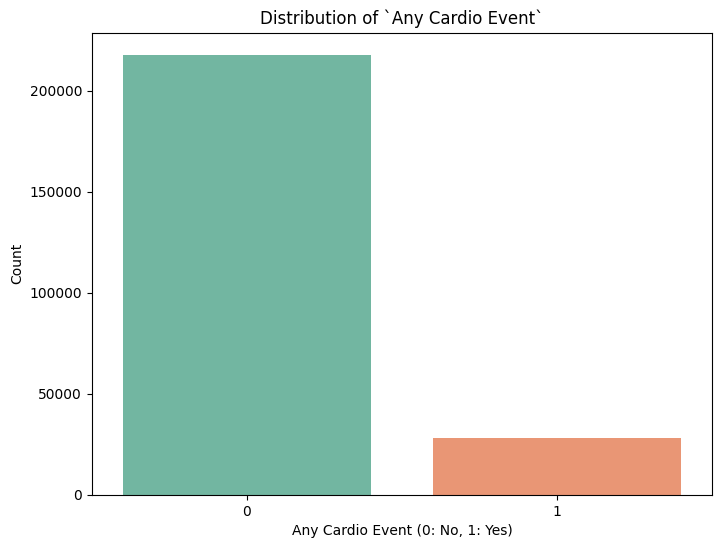

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'heart_risk_data' DataFrame is available from the previous code
plt.figure(figsize=(8, 6))
sns.countplot(x='any_cardio_event', data=heart_risk_data,palette='Set2')
plt.title('Distribution of `Any Cardio Event`')
plt.xlabel('Any Cardio Event (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()


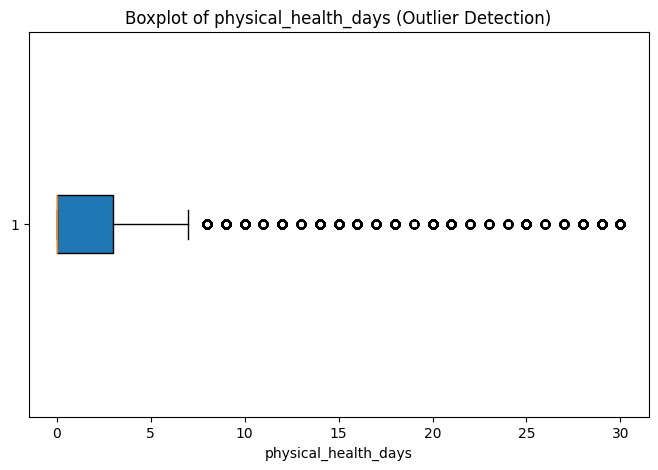

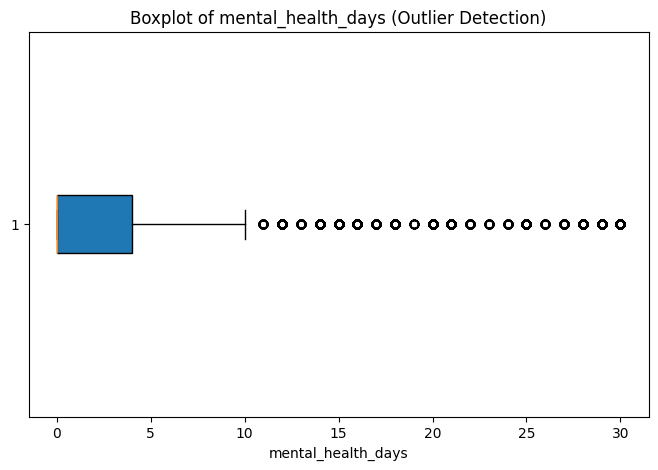

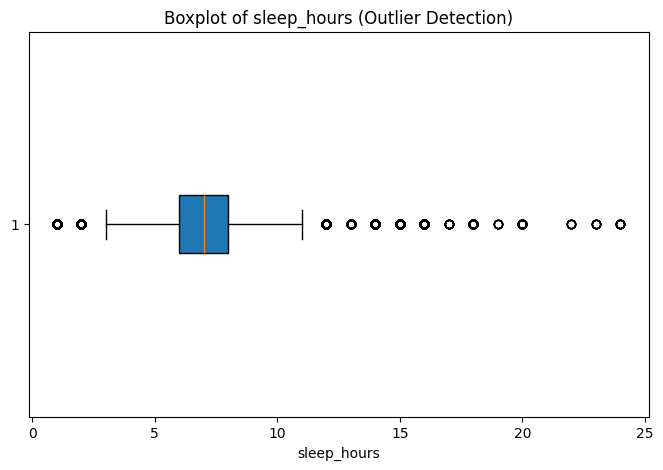

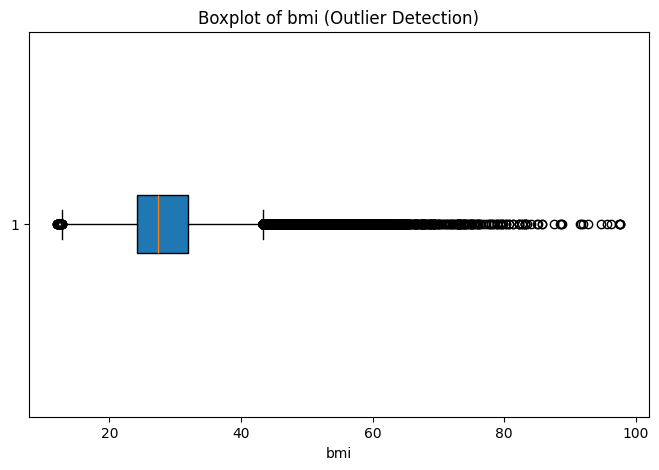

In [ ]:
# Specify the columns you want to analyze
columns_to_analyze = ['physical_health_days', 'mental_health_days', 'sleep_hours', 'bmi']

# Loop through each numerical column and create a boxplot to visualize outliers
for col in columns_to_analyze:
    plt.figure(figsize=(8, 5))
    plt.boxplot(heart_risk_data[col], vert=False, patch_artist=True)
    plt.title(f'Boxplot of {col} (Outlier Detection)')
    plt.xlabel(col)
    plt.show()  # Display the plot

any_cardio_event              1.000000
age_category                  0.252244
alcohol_drinkers             -0.099555
blind_or_vision_difficulty    0.104155
bmi                           0.046847
covid_pos                    -0.034079
deaf_or_hard_of_hearing       0.132911
diff_day_2_day_activity       0.198763
general_health               -0.252620
had_arthritis                 0.178378
had_asthma                    0.044521
had_copd                      0.177035
had_depressive_disorder       0.041240
had_diabetes                  0.175781
had_kidney_disease            0.153766
had_skin_cancer               0.082792
mental_health_days            0.037048
physical_activities          -0.111630
physical_health_days          0.184635
race_ethnicity_category       0.030245
sex                           0.061325
sleep_hours                   0.013925
smoking_status                0.066185
state                        -0.003156
Name: any_cardio_event, dtype: float64


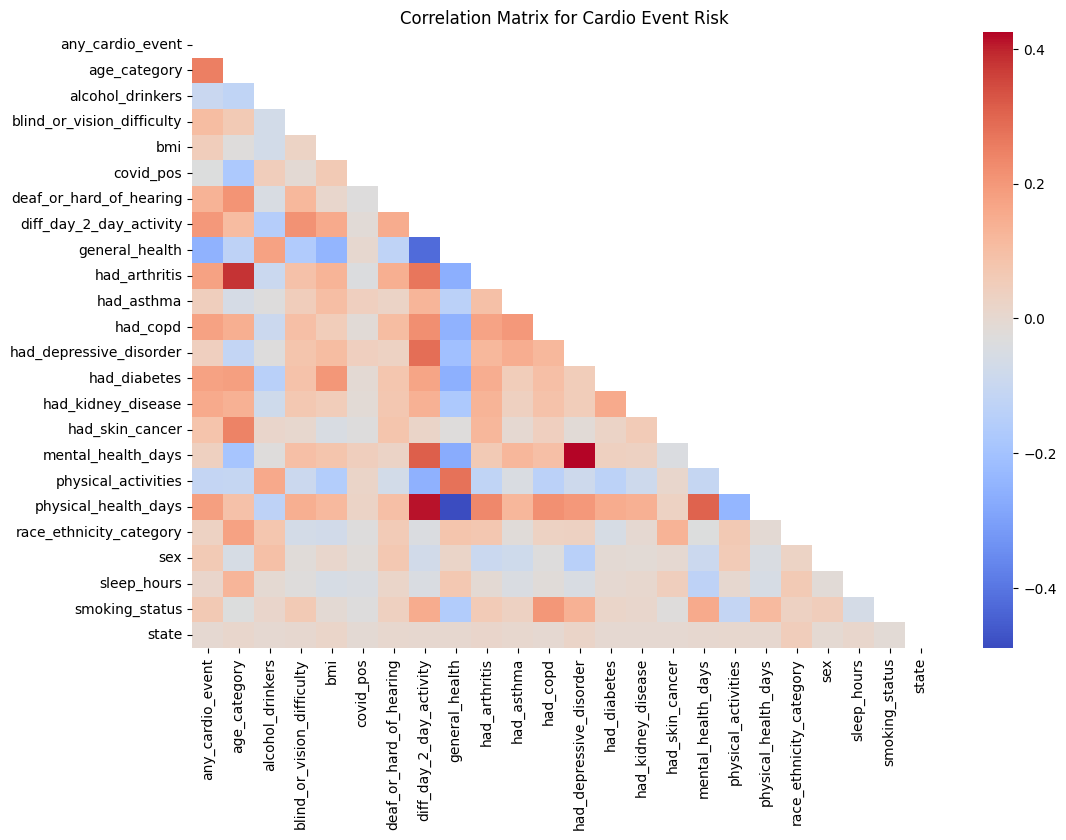

In [ ]:
# Select numerical features and the target variable
heart_risk_data.drop(columns=['chest_scan'], inplace=True)
numerical_features = heart_risk_data.select_dtypes(include=['number']).columns
numerical_features = numerical_features.difference(['any_cardio_event'])
target_variable = 'any_cardio_event'


# Calculate the correlation matrix
correlation_matrix = heart_risk_data[[target_variable] + numerical_features.tolist()].corr()

# Print the correlation of 'AnyCardioEvent' with all other variables
print(correlation_matrix['any_cardio_event'])

# Plot the heatmap with a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix for Cardio Event Risk')
plt.show()

# Hypothesis Test

## Demographic Factors

Unique Age Categories:
[ 9 10 11 12  6  4  8  7  5  3  1  2  0]


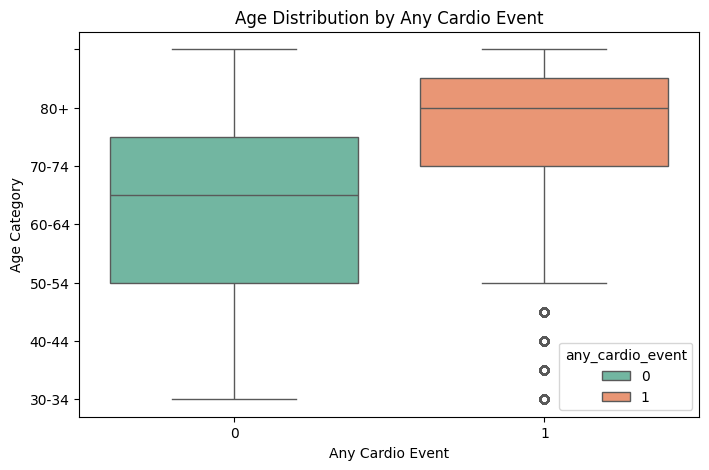

In [ ]:
#Hypothesis 1: Older individuals are at a higher risk of experiencing a cardiovascular event.
# Boxplot for Age Category vs. Any Cardio Event
# AgeCategory Mapping (Ordinal)

# Create a dictionary to map the detailed age categories to simpler labels
age_mapping_plot = {
    0: "18-24",
    1: "25-29",
    2: "30-34",
    3: "35-39",
    4: "40-44",
    5: "45-49",
    6: "50-54",
    7: "55-59",
    8: "60-64",
    9: "65-69",
    10: "70-74",
    11: "75-79",
    12: "80+"
}

# Replace the detailed age categories with the simpler labels
heart_risk_data["age_category"] = heart_risk_data["age_category"].replace(age_mapping)

# Display the unique age categories after mapping to verify the changes
print("Unique Age Categories:")
print(heart_risk_data["age_category"].unique())

plt.figure(figsize=(8, 5))
sns.boxplot(x=heart_risk_data["any_cardio_event"],
            y=heart_risk_data["age_category"],
            hue=heart_risk_data["any_cardio_event"],
            palette="Set2")
plt.title("Age Distribution by Any Cardio Event")
plt.xlabel("Any Cardio Event")
plt.ylabel("Age Category")


# Get current y-tick locations and labels
y_ticks, y_ticklabels = plt.yticks()

# Create a list of desired age range labels
age_range_labels = [label for value, label in age_mapping_plot.items() if value in y_ticks]

age_range_labels
# Set the updated y-axis tick labels
plt.gca().set_yticklabels(age_range_labels)

plt.show()


plt.show()

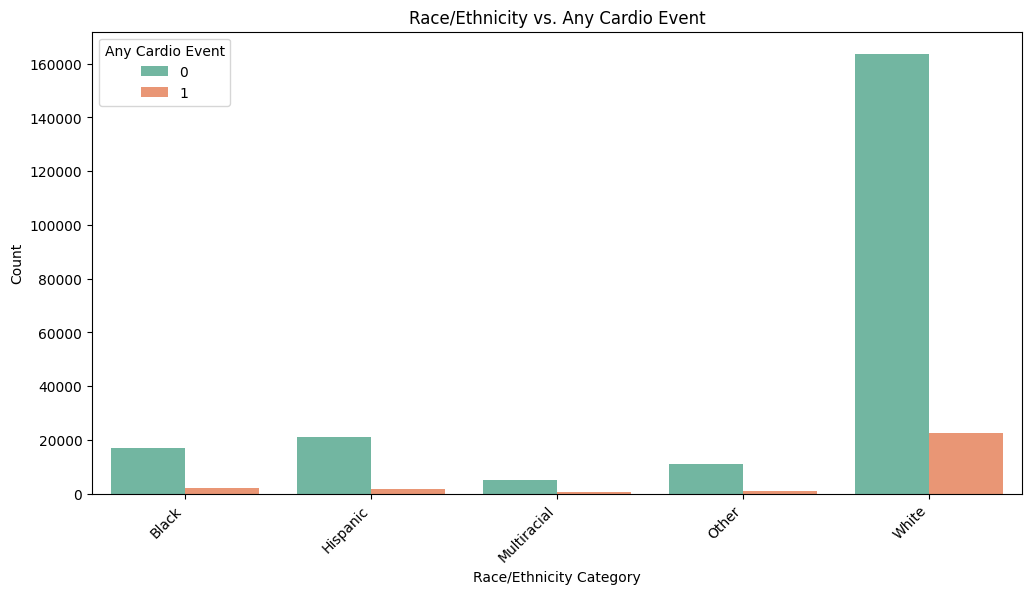

Percentage Distribution of Race/Ethnicity in Each Cardio Event Group (%):


any_cardio_event  race_ethnicity_category
0                 4                          75.180149
                  1                           9.604707
                  0                           7.871882
                  3                           5.081819
                  2                           2.261444
1                 4                          80.004962
                  0                           7.757735
                  1                           5.868802
                  3                           4.040118
                  2                           2.328384
Name: proportion, dtype: float64

In [ ]:
# Hypothesis 2: Race/Ethnicity may be associated with the risk of cardiovascular events.
# Create a count plot to visualize race/ethnicity distribution across cardio event groups
plt.figure(figsize=(12, 6))
sns.countplot(x='race_ethnicity_category', hue='any_cardio_event', data=heart_risk_data, palette='Set2')
plt.title('Race/Ethnicity vs. Any Cardio Event')
plt.xlabel('Race/Ethnicity Category')
plt.ylabel('Count')
plt.legend(title='Any Cardio Event')
# Get the current x-axis tick locations and labels
x_ticks = plt.gca().get_xticks()
x_ticklabels = plt.gca().get_xticklabels()

# Replace numerical labels with descriptive labels
legend_labels = {
    0: 'Black',
    1: 'Hispanic',
    2: 'Multiracial',
    3: 'Other',
    4: 'White'
}
x_ticklabels_updated = [legend_labels.get(int(label.get_text()), label.get_text()) for label in x_ticklabels]

# Set the updated x-axis tick labels
plt.gca().set_xticklabels(x_ticklabels_updated, rotation=45, ha="right")  # Adjust rotation and alignment if needed


plt.show()

# Calculate and print the percentage of each race/ethnicity in each cardio event group
race_ethnicity_pct = heart_risk_data.groupby('any_cardio_event')['race_ethnicity_category'].value_counts(normalize=True) * 100
print("Percentage Distribution of Race/Ethnicity in Each Cardio Event Group (%):")
race_ethnicity_pct


## Physical Health Factors

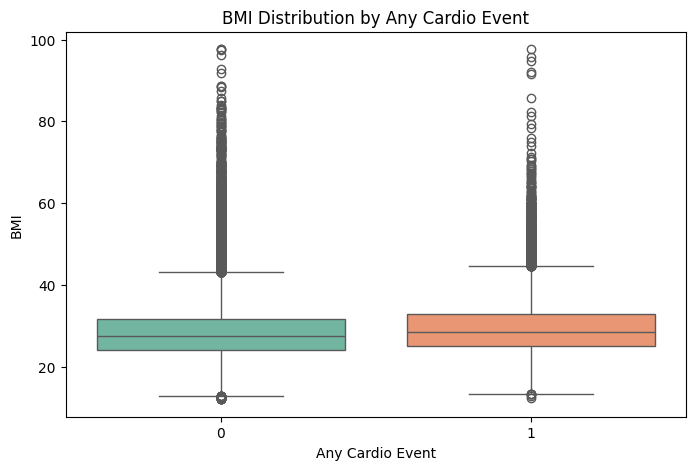

BMI Group Means:
any_cardio_event
0    28.559134
1    29.516733
Name: bmi, dtype: float64


In [ ]:
# Hypothesis 3: Individuals with a higher Body Mass Index (BMI) are more likely to experience a cardiovascular event.
# Create a boxplot to show the distribution of BMI across cardio event groups
plt.figure(figsize=(8, 5))
sns.boxplot(x=heart_risk_data["any_cardio_event"],
            y=heart_risk_data["bmi"],
            hue=heart_risk_data["any_cardio_event"],
            palette='Set2')
plt.legend([], [], frameon=False)  # Hides the redundant legend
plt.title("BMI Distribution by Any Cardio Event")
plt.xlabel("Any Cardio Event")
plt.ylabel("BMI")
plt.show()


# Calculate and print the mean BMI for each cardio event group
bmi_group_means = heart_risk_data.groupby("any_cardio_event")["bmi"].mean()
print("BMI Group Means:")
print(bmi_group_means)


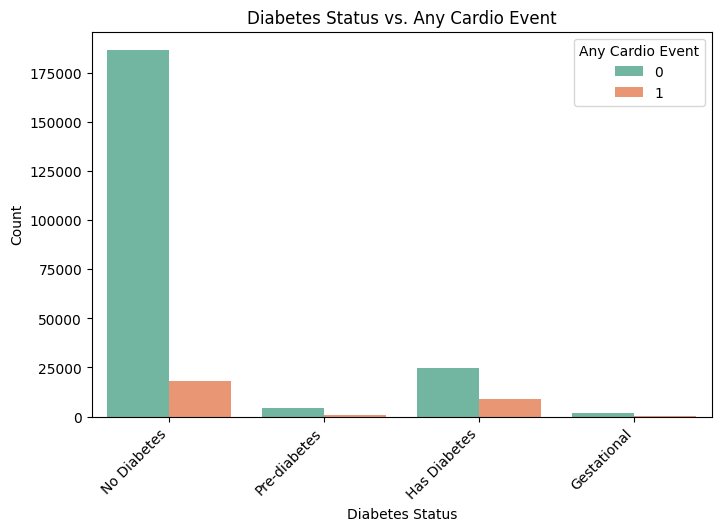

Diabetes Group Means (%):
any_cardio_event  had_diabetes
0                 0               85.656549
                  2               11.404125
                  1                2.089677
                  3                0.849649
1                 0               64.730482
                  2               31.814155
                  1                2.984017
                  3                0.471347
Name: proportion, dtype: float64


In [ ]:
#Hypothesis 4: Individuals with diabetes (including gestational or pre-diabetic conditions) have a higher risk of experiencing a cardiovascular event.
# Create a count plot to display the distribution of diabetes status across cardio event groups
plt.figure(figsize=(8, 5))
sns.countplot(x=heart_risk_data["had_diabetes"], hue=heart_risk_data["any_cardio_event"], palette="Set2")
plt.title("Diabetes Status vs. Any Cardio Event")
plt.xlabel("Diabetes Status")
plt.ylabel("Count")
plt.legend(title="Any Cardio Event")

# Get the current x-axis tick locations and labels
x_ticks = plt.gca().get_xticks()
x_ticklabels = plt.gca().get_xticklabels()

# Create a dictionary to map the numerical values to labels
diabetes_labels = {
    0: 'No Diabetes',
    1: 'Pre-diabetes',
    2: 'Has Diabetes',
    3: 'Gestational'
}

# Replace numerical labels with descriptive labels using the mapping dictionary
x_ticklabels_updated = [diabetes_labels.get(int(label.get_text()), label.get_text()) for label in x_ticklabels]

# Set the updated x-axis tick labels
plt.gca().set_xticklabels(x_ticklabels_updated, rotation=45, ha="right")  # Adjust rotation and alignment if needed

plt.show()

# Calculate and print the percentage of individuals with different diabetes statuses in each group
diabetes_group_means = heart_risk_data.groupby("any_cardio_event")["had_diabetes"].value_counts(normalize=True) * 100
print("Diabetes Group Means (%):")
print(diabetes_group_means)

## Lifestyle Factors

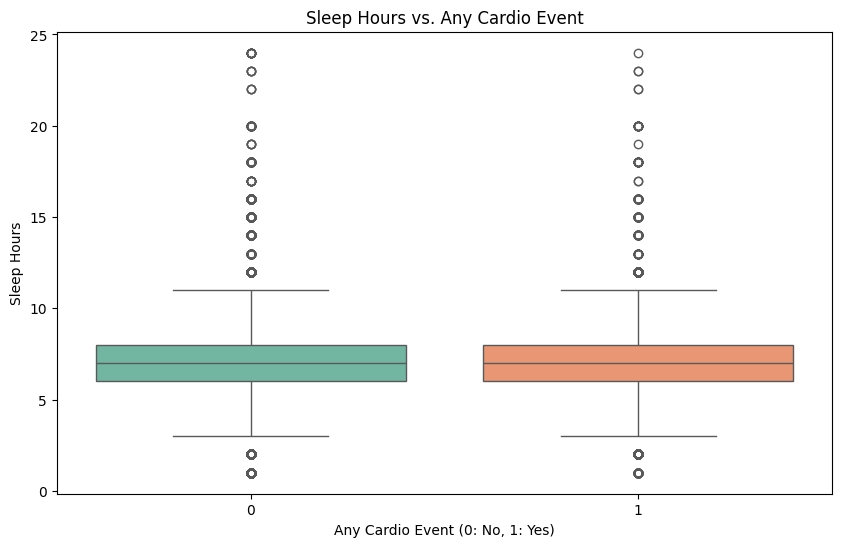

Mean Sleep Hours by Cardio Event Group:
any_cardio_event
0    7.014017
1    7.076975
Name: sleep_hours, dtype: float64


In [ ]:
# Hypothesis : Individuals with cardio events tend to have fewer sleep hours
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Create a box plot to visualize the relationship
sns.boxplot(x='any_cardio_event', y='sleep_hours', data=heart_risk_data, palette='Set2')
plt.title('Sleep Hours vs. Any Cardio Event')
plt.xlabel('Any Cardio Event (0: No, 1: Yes)')
plt.ylabel('Sleep Hours')
plt.show()

# Calculate and print the mean sleep hours for each cardio event group
sleep_hours_means = heart_risk_data.groupby("any_cardio_event")["sleep_hours"].mean()
print("Mean Sleep Hours by Cardio Event Group:")
print(sleep_hours_means)

# Perform a statistical test (e.g., t-test) to assess the significance of the difference
# from scipy import stats
# group_0 = heart_risk_data[heart_risk_data['any_cardio_event'] == 0]['sleep_hours']
# group_1 = heart_risk_data[heart_risk_data['any_cardio_event'] == 1]['sleep_hours']
# t_statistic, p_value = stats.ttest_ind(group_0, group_1)

# print("\nIndependent t-test results:")
# print(f"t-statistic: {t_statistic}")
# print(f"p-value: {p_value}")

### Based on the very low p-value, we can reject the null hypothesis and conclude that there is a statistically significant difference in sleep hours between individuals with and without cardio events.
#The negative t-statistic suggests that, on average, individuals with cardio events tend to have fewer sleep hours compared to those without cardio events.

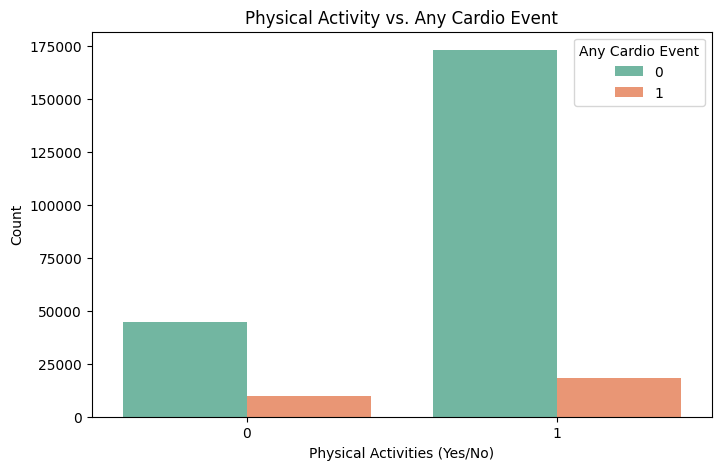

Physical Activity Group Means (%):
any_cardio_event  physical_activities
0                 1                      79.431608
                  0                      20.568392
1                 1                      64.865152
                  0                      35.134848
Name: proportion, dtype: float64


In [ ]:
#Hypothesis : Lower levels of physical activity are associated with a higher risk of cardiovascular events.
# Create a count plot to visualize physical activity distribution across cardio event groups
plt.figure(figsize=(8, 5))
sns.countplot(x=heart_risk_data["physical_activities"], hue=heart_risk_data["any_cardio_event"], palette='Set2')
plt.title("Physical Activity vs. Any Cardio Event")
plt.xlabel("Physical Activities (Yes/No)")
plt.ylabel("Count")
plt.legend(title="Any Cardio Event")
plt.show()

# Calculate and print the percentage of individuals who are physically active in each group
physical_activity_group_means = heart_risk_data.groupby("any_cardio_event")["physical_activities"].value_counts(normalize=True) * 100
print("Physical Activity Group Means (%):")
print(physical_activity_group_means)

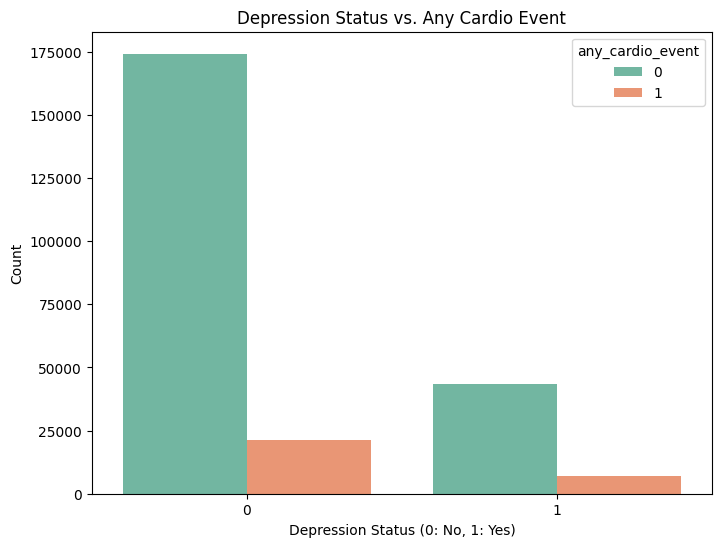

Percentage distribution of individuals with depressive disorder in each cardio event group (%):


any_cardio_event  had_depressive_disorder
0                 0                          80.019932
                  1                          19.980068
1                 0                          74.788248
                  1                          25.211752
Name: proportion, dtype: float64

In [ ]:
#Hypothesis 7: Individuals with Mental disorder have a significantly increased risk of experiencing a cardiovascular events.
plt.figure(figsize=(8, 6))
sns.countplot(x='had_depressive_disorder', hue='any_cardio_event', data=heart_risk_data, palette='Set2')
plt.title('Depression Status vs. Any Cardio Event')
plt.xlabel('Depression Status (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# Calculate and print the percentage of individuals with depressive disorder in each cardio event group
depressive_disorder_pct = heart_risk_data.groupby("any_cardio_event")["had_depressive_disorder"].value_counts(normalize=True) * 100
print("Percentage distribution of individuals with depressive disorder in each cardio event group (%):")
depressive_disorder_pct

# from scipy.stats import chi2_contingency

# # Create a contingency table
# contingency_table = pd.crosstab(heart_risk_data['had_depressive_disorder'], heart_risk_data['any_cardio_event'])

# # Perform the Chi-squared test
# chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# # Print the results
# print("Chi-squared statistic:", chi2_stat)
# print("P-value:", p_value)
# print("Degrees of freedom:", dof)
# print("Expected frequencies:", expected)

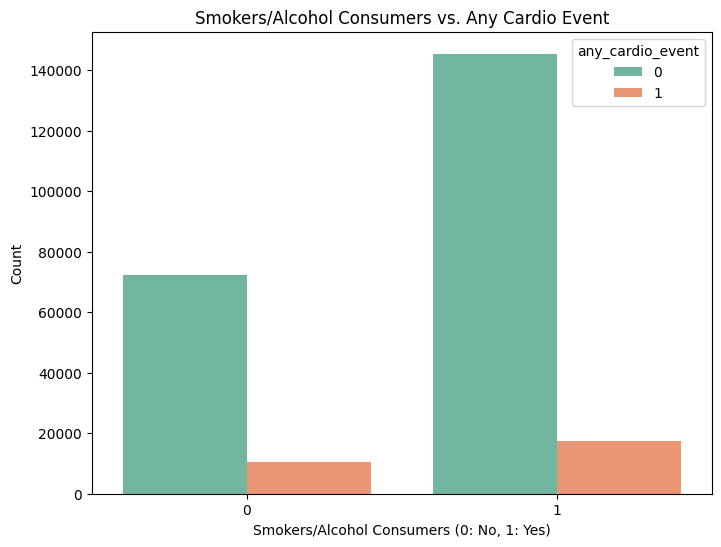

Percentage distribution of alcohol drinkers in each cardio event group (%):


any_cardio_event  alcohol_or_smoke_habit
0                 1                         66.827870
                  0                         33.172130
1                 1                         62.345395
                  0                         37.654605
Name: proportion, dtype: float64

In [ ]:
# Hypothesis: Individuals with smoking or driking habits have a increased risk of experiencing a cardiovascular events.

# Create the 'alcohol_or_smoke_habit' column based on 'alcohol_drinkers' and 'smoking_status'
heart_risk_data['alcohol_or_smoke_habit'] = 0  # Initialize to 0 (no habit)
heart_risk_data.loc[(heart_risk_data['alcohol_drinkers'] == 1) | (heart_risk_data['smoking_status'] == 1), 'alcohol_or_smoke_habit'] = 1 # Set to 1 if either is present

plt.figure(figsize=(8, 6))
sns.countplot(x='alcohol_or_smoke_habit', hue='any_cardio_event', data=heart_risk_data, palette='Set2')
plt.title('Smokers/Alcohol Consumers vs. Any Cardio Event')
plt.xlabel('Smokers/Alcohol Consumers (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# Calculate and print the percentage of alcohol drinkers in each cardio event group
alcohol_smoke_pct = heart_risk_data.groupby("any_cardio_event")["alcohol_or_smoke_habit"].value_counts(normalize=True) * 100
print("Percentage distribution of alcohol drinkers in each cardio event group (%):")
alcohol_smoke_pct



# ML Modeling

In [ ]:
heart_risk_data.dtypes

,0
state,int64
sex,int64
general_health,int64
physical_health_days,float64
mental_health_days,float64
physical_activities,int64
sleep_hours,float64
had_asthma,int64
had_skin_cancer,int64
had_copd,int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [ ]:
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    XGBClassifier()
]

X = heart_risk_data.drop('any_cardio_event', axis=1)  # Features
y = heart_risk_data['any_cardio_event']  # Target


🔹 Model: LogisticRegression
   Coefficients: [[-0.00552831  0.67231192 -0.51240789 -0.00653611 -0.00836226 -0.22027266
  -0.0667033   0.17434841  0.24139133  0.62611744  0.14983865  0.6996801
   0.24685941  0.26878126  0.16860423  0.27003207  0.0022274   0.1840444
  -0.02950515 -0.38467356  0.01038409  0.0872101   0.34315536  0.07483666]]
   Variables: ['state' 'sex' 'general_health' 'physical_health_days'
 'mental_health_days' 'physical_activities' 'sleep_hours' 'had_asthma'
 'had_skin_cancer' 'had_copd' 'had_depressive_disorder'
 'had_kidney_disease' 'had_arthritis' 'had_diabetes'
 'deaf_or_hard_of_hearing' 'blind_or_vision_difficulty'
 'race_ethnicity_category' 'age_category' 'bmi' 'alcohol_drinkers'
 'covid_pos' 'smoking_status' 'diff_day_2_day_activity'
 'alcohol_or_smoke_habit']
   Intercept: [-1.52501897]
   Accuracy: 0.8869
   CV Scores: [0.88621711 0.88851136 0.88682369 0.88635902 0.88647518]
   Mean CV Score: 0.8869


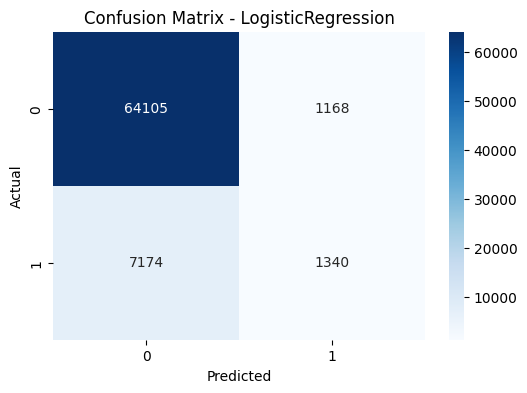

   Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     65273
           1       0.53      0.16      0.24      8514

    accuracy                           0.89     73787
   macro avg       0.72      0.57      0.59     73787
weighted avg       0.86      0.89      0.86     73787


🔹 Model: RandomForestClassifier
   Coefficients: [0.14220057 0.01934496 0.05873725 0.06359792 0.05034587 0.02016568
 0.07822739 0.0173092  0.01447901 0.01776991 0.01744838 0.01407533
 0.02209454 0.02730412 0.01446842 0.01157225 0.02860161 0.09938023
 0.17170227 0.01775095 0.0232357  0.034826   0.02046788 0.01489455]
   Variables: Index(['state', 'sex', 'general_health', 'physical_health_days',
       'mental_health_days', 'physical_activities', 'sleep_hours',
       'had_asthma', 'had_skin_cancer', 'had_copd', 'had_depressive_disorder',
       'had_kidney_disease', 'had_arthritis', 'had_diabetes',
       'deaf_or_hard_of_hearing', 'blind

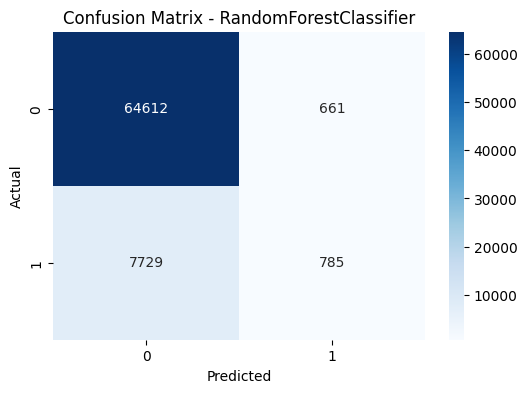

   Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     65273
           1       0.54      0.09      0.16      8514

    accuracy                           0.89     73787
   macro avg       0.72      0.54      0.55     73787
weighted avg       0.85      0.89      0.85     73787


🔹 Model: XGBClassifier
   Coefficients: [0.01398979 0.07131083 0.23077154 0.01829808 0.01359276 0.01223178
 0.01505564 0.01509992 0.01557305 0.05255323 0.01419687 0.04202664
 0.03611077 0.04282755 0.01920529 0.02215462 0.02030436 0.17490056
 0.01481576 0.02189989 0.01274576 0.02036872 0.08662058 0.01334602]
   Variables: Index(['state', 'sex', 'general_health', 'physical_health_days',
       'mental_health_days', 'physical_activities', 'sleep_hours',
       'had_asthma', 'had_skin_cancer', 'had_copd', 'had_depressive_disorder',
       'had_kidney_disease', 'had_arthritis', 'had_diabetes',
       'deaf_or_hard_of_hearing', 'blind_or_visio

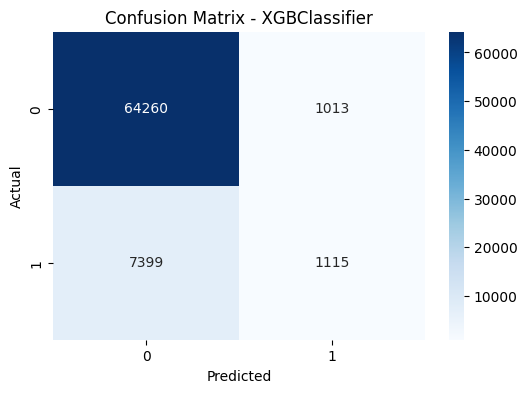

   Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     65273
           1       0.52      0.13      0.21      8514

    accuracy                           0.89     73787
   macro avg       0.71      0.56      0.57     73787
weighted avg       0.85      0.89      0.85     73787



In [ ]:
# Without Class Balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=78)
# Ensure y_train and y_test are of integer type
y_train = y_train.astype(int)
y_test = y_test.astype(int)
results = {}
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)  # Train model

    # Extract coefficients or feature importance
    if model_name == "LogisticRegression":
        coefficients = model.coef_
        variables = model.feature_names_in_
        intercept = model.intercept_
    else:
        coefficients = model.feature_importances_
        variables = X.columns
        intercept = None

    # Print model details
    print(f"\n🔹 Model: {model_name}")
    print(f"   Coefficients: {coefficients}")
    print(f"   Variables: {variables}")
    print(f"   Intercept: {intercept}")

    # Predictions
    y_pred = model.predict(X_test)

    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   CV Scores: {scores}")
    print(f"   Mean CV Score: {scores.mean():.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Classification Report
    print("   Classification Report:\n", classification_report(y_test, y_pred))


🔹 Model: LogisticRegression
   Coefficients: [[-1.21292572e-03 -1.85149529e-02 -1.01629758e+00  6.71775488e-04
   2.06467736e-02 -4.70087726e-01  3.79574978e-03 -7.33486515e-01
  -7.58313171e-01 -2.94409763e-01 -5.96868614e-01 -4.66738141e-01
  -2.42380536e-01  4.51053841e-02 -6.74451480e-01 -5.15365099e-01
   8.12700350e-02  2.96488127e-01  1.49474502e-02 -6.93548625e-01
  -8.60056651e-01 -7.98612691e-02 -4.92425561e-01  1.48397509e-01]]
   Variables: ['state' 'sex' 'general_health' 'physical_health_days'
 'mental_health_days' 'physical_activities' 'sleep_hours' 'had_asthma'
 'had_skin_cancer' 'had_copd' 'had_depressive_disorder'
 'had_kidney_disease' 'had_arthritis' 'had_diabetes'
 'deaf_or_hard_of_hearing' 'blind_or_vision_difficulty'
 'race_ethnicity_category' 'age_category' 'bmi' 'alcohol_drinkers'
 'covid_pos' 'smoking_status' 'diff_day_2_day_activity'
 'alcohol_or_smoke_habit']
   Intercept: [0.24655809]
   Accuracy: 0.7524
   CV Scores: [0.88621711 0.88851136 0.88682369 0.8863

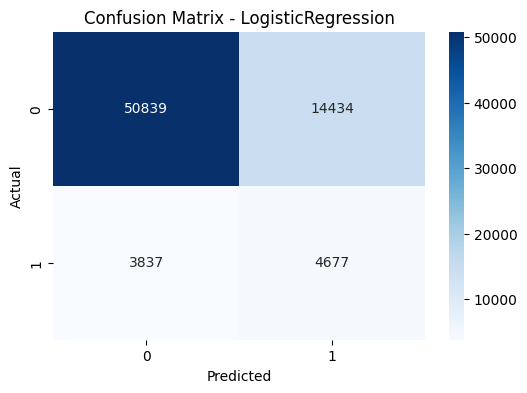

   Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85     65273
           1       0.24      0.55      0.34      8514

    accuracy                           0.75     73787
   macro avg       0.59      0.66      0.59     73787
weighted avg       0.85      0.75      0.79     73787


🔹 Model: RandomForestClassifier
   Coefficients: [0.09638342 0.01550829 0.13625254 0.05922773 0.04322343 0.03439828
 0.12090506 0.01367752 0.00862542 0.00759868 0.01265461 0.00614411
 0.01369152 0.02381085 0.00858019 0.00618797 0.02421035 0.13381012
 0.11293139 0.03927042 0.03150186 0.02813244 0.01175254 0.01152126]
   Variables: Index(['state', 'sex', 'general_health', 'physical_health_days',
       'mental_health_days', 'physical_activities', 'sleep_hours',
       'had_asthma', 'had_skin_cancer', 'had_copd', 'had_depressive_disorder',
       'had_kidney_disease', 'had_arthritis', 'had_diabetes',
       'deaf_or_hard_of_hearing', 'blind

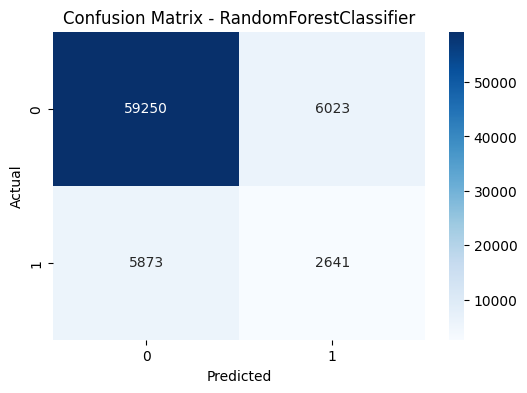

   Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     65273
           1       0.30      0.31      0.31      8514

    accuracy                           0.84     73787
   macro avg       0.61      0.61      0.61     73787
weighted avg       0.84      0.84      0.84     73787


🔹 Model: XGBClassifier
   Coefficients: [0.00540946 0.01189802 0.22676703 0.03582947 0.03088521 0.04144203
 0.14695409 0.04106617 0.02169157 0.00827438 0.03492491 0.00954653
 0.01957561 0.01979409 0.01908122 0.02119066 0.01859289 0.09061252
 0.00794297 0.07846279 0.05674383 0.02647821 0.01868365 0.00815269]
   Variables: Index(['state', 'sex', 'general_health', 'physical_health_days',
       'mental_health_days', 'physical_activities', 'sleep_hours',
       'had_asthma', 'had_skin_cancer', 'had_copd', 'had_depressive_disorder',
       'had_kidney_disease', 'had_arthritis', 'had_diabetes',
       'deaf_or_hard_of_hearing', 'blind_or_visio

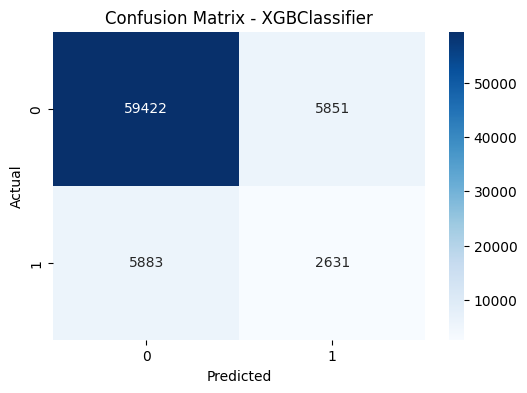

   Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     65273
           1       0.31      0.31      0.31      8514

    accuracy                           0.84     73787
   macro avg       0.61      0.61      0.61     73787
weighted avg       0.84      0.84      0.84     73787



In [ ]:
# With Class Balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=78)
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Ensure y_train and y_test are of integer type
y_train = y_train.astype(int)
y_test = y_test.astype(int)
results = {}
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train_resampled, y_train_resampled)  # Train model

    # Extract coefficients or feature importance
    if model_name == "LogisticRegression":
        coefficients = model.coef_
        variables = model.feature_names_in_
        intercept = model.intercept_
    else:
        coefficients = model.feature_importances_
        variables = X.columns
        intercept = None

    # Print model details
    print(f"\n🔹 Model: {model_name}")
    print(f"   Coefficients: {coefficients}")
    print(f"   Variables: {variables}")
    print(f"   Intercept: {intercept}")

    # Predictions
    y_pred = model.predict(X_test)

    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   CV Scores: {scores}")
    print(f"   Mean CV Score: {scores.mean():.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Classification Report
    print("   Classification Report:\n", classification_report(y_test, y_pred))

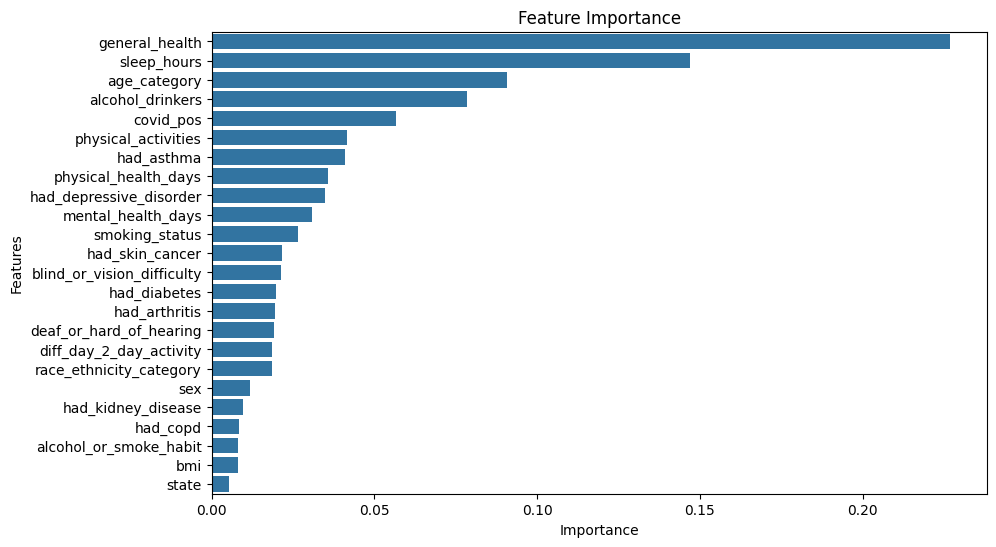

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
sorted_feature_importances = feature_importances.sort_values(ascending=False)
# sorted plot
plt.figure(figsize=(10, 6))

sns.barplot(x=sorted_feature_importances, y=sorted_feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()